# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [128]:
%%capture
pip install geopandas

In [129]:
import pandas as pd
import geopandas as gpd
denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [130]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [131]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

### A visualization of Denver's neighborhoods and the Starbucks store locations.

In [132]:
denver.head()

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77


In [133]:
neighborhoods.head()

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."


In [134]:
census.head()

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN


In [135]:
from shapely.geometry import Point, MultiPoint, Polygon

In [136]:
# use zip
denver['geometry'] = [Point(xy) for xy in zip(denver['Longitude'], denver['Latitude'])] 
denver.head()

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75,POINT (-105.01 39.75)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75,POINT (-104.99 39.75)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68,POINT (-104.97 39.68)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76,POINT (-105.02 39.76)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77,POINT (-105.05 39.77)


In [137]:
# use gpd
denver1= gpd.GeoDataFrame(denver, geometry=gpd.points_from_xy(denver['Longitude'], denver['Latitude']))
denver1.head()

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75,POINT (-105.01000 39.75000)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75,POINT (-104.99000 39.75000)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68,POINT (-104.97000 39.68000)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76,POINT (-105.02000 39.76000)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77,POINT (-105.05000 39.77000)


In [138]:
neighborhoods_geo=neighborhoods['geometry']
neighborhoods_geo.head()

0    POLYGON ((-105.00042 39.74552, -105.00041 39.7...
1    POLYGON ((-104.94070 39.69540, -104.94070 39.6...
2    POLYGON ((-104.94070 39.71156, -104.94069 39.7...
3    POLYGON ((-104.95931 39.71566, -104.95931 39.7...
4    POLYGON ((-104.97342 39.68982, -104.97356 39.6...
Name: geometry, dtype: geometry

In [139]:
crs={'init':'epsg:4326'}

In [140]:
cities_geo=gpd.GeoDataFrame(denver,crs=crs, geometry=denver['geometry'])
cities_geo

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75,POINT (-105.01000 39.75000)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75,POINT (-104.99000 39.75000)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68,POINT (-104.97000 39.68000)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76,POINT (-105.02000 39.76000)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77,POINT (-105.05000 39.77000)
...,...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75,POINT (-105.00000 39.75000)
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76,POINT (-104.90000 39.76000)
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74,POINT (-104.97000 39.74000)
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65,POINT (-104.91000 39.65000)


<AxesSubplot:>

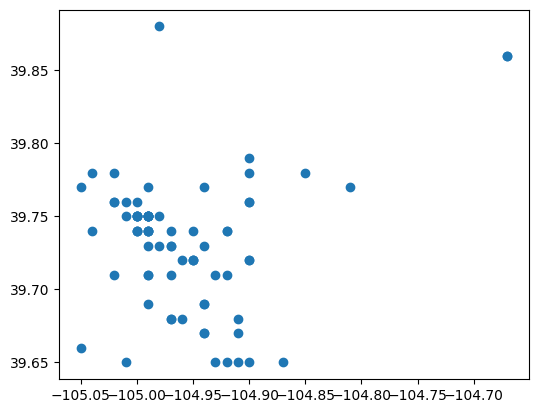

In [141]:
cities_geo.plot()

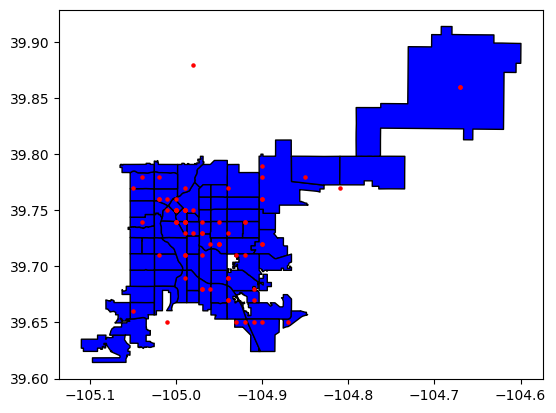

In [149]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.set_aspect('equal')

neighborhoods_geo.plot(ax=ax,facecolor='Blue', edgecolor='k',alpha=1,linewidth=1)

cities_geo.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

### Find the neighborhoods with the highest proportion of people in the target demographic.

In [143]:
neighborhoods.head()

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."


In [144]:
census.head()

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN


In [145]:
new_neighborhoods=pd.merge(neighborhoods,census,how='left',on='NBHD_ID')
new_neighborhoods['area']=new_neighborhoods['geometry'].area
new_neighborhoods['AGE_18_TO_34_area_ratio']=new_neighborhoods['AGE_18_TO_34']/new_neighborhoods['area']
new_neighborhoods.sort_values('AGE_18_TO_34_area_ratio',ascending=False,inplace=True)
new_neighborhoods.head(3)

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,area,AGE_18_TO_34_area_ratio
45,9,Capitol Hill,"POLYGON ((-104.97341 39.74003, -104.97299 39.7...",Capitol Hill,14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0,0.000184,4.495116e+07
46,47,North Capitol Hill,"POLYGON ((-104.97338 39.74378, -104.97339 39.7...",North Capitol Hill,5823.0,194.0,3238.0,1968.0,423.0,3851.0,461.0,1010.0,0.000096,3.374537e+07
5,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",Speer,10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.000232,2.307399e+07


### Select the top three neighborhoods where your client should focus their search.

In [146]:
new_neighborhoods['coords'] = new_neighborhoods['geometry'].apply(lambda x: x.representative_point().coords[:])
new_neighborhoods['coords'] = [coords[0] for coords in new_neighborhoods['coords']]
new_anno=new_neighborhoods.head(3)
new_anno

,NBHD_ID,NBHD_NAME_x,geometry,NBHD_NAME_y,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,area,AGE_18_TO_34_area_ratio,coords
45,9,Capitol Hill,"POLYGON ((-104.97341 39.74003, -104.97299 39.7...",Capitol Hill,14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0,0.000184,4.495116e+07,"(-104.98019393047466, 39.73287968286655)"
46,47,North Capitol Hill,"POLYGON ((-104.97338 39.74378, -104.97339 39.7...",North Capitol Hill,5823.0,194.0,3238.0,1968.0,423.0,3851.0,461.0,1010.0,0.000096,3.374537e+07,"(-104.98053860447689, 39.74400581081494)"
5,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",Speer,10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.000232,2.307399e+07,"(-104.98037487449828, 39.71906601364779)"


<Figure size 4500x3000 with 0 Axes>

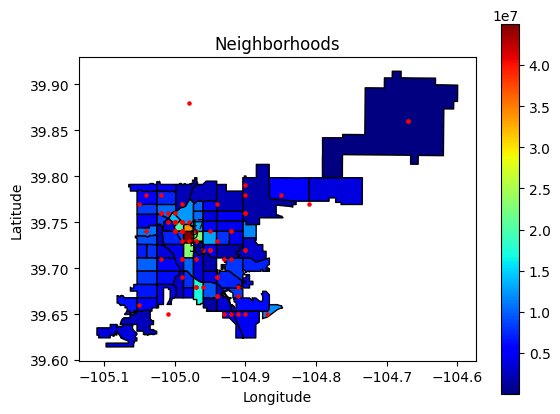

In [147]:
#use AGE_18_TO_34_area_ratio, target demographic density
import matplotlib.pyplot as plt
plt.figure(dpi=300,figsize=(15,10))
fig, ax = plt.subplots()

ax.set_aspect('equal')

new_neighborhoods.plot(ax=ax,column='AGE_18_TO_34_area_ratio',facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="jet",legend=True)

for idx, row in new_anno.iterrows():
    ax.annotate(text=row['NBHD_ID'], xy=row['coords'])

cities_geo.plot(ax=ax, marker='o', color='red', markersize=5)


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Neighborhoods')


plt.show()

## Summary

Coffee shop location recommendation:

    1. Capitol Hill
    
    2. North Capitol Hill
    
    3. Speer